### Direct Search
Likely to be MORDM
1) Initialize Model/ Problem Specification
2) Search Candidate Solutions (based on Ref Scenario)
3) Re-Evaluate Solutions under Uncertainty (Many Scenario)
4) Save Results

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# EMA
from ema_workbench import (Model, RealParameter,  Scenario, MultiprocessingEvaluator, ScalarOutcome, perform_experiments, ema_logging)
from ema_workbench import Samplers, Policy
from ema_workbench import save_results, load_results
from ema_workbench.em_framework.optimization import EpsilonProgress, HyperVolume
from ema_workbench.analysis import parcoords
# Model
from problem_formulation import get_model_for_problem_formulation
ema_logging.log_to_stderr(ema_logging.INFO)
# parameter definition for visualization libraries
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")

c:\Users\varun\anaconda3\lib\site-packages\ema_workbench\em_framework\evaluators.py:58: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
c:\Users\varun\anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive " "inspection not available"), ImportWarning)


### 1) Initialize Model

In [2]:
#------------------------- Set Model Parameters
problem_formulation = 6
model, steps = get_model_for_problem_formulation(problem_formulation)

uncertainties = model.uncertainties
levers = model.levers
outcomes = model.outcomes

#------------------------- Reference Scenario
ref_val = {'Bmax': 175, 
           'Brate': 1.5, 
           'pfail': 0.5,
            'discount rate': 3.5,
            'ID flood wave shape': 4}

ref_dict = {}
# < ref_dict >
# reference scenario updated for all dike rings
for key in model.uncertainties:
    name_split = key.name.split('_')
    if len(name_split) == 1:
        if key.name in ref_val.keys():
            ref_dict.update({key.name: ref_val[key.name]})
    else:
        ref_dict.update({key.name: ref_val[name_split[1]]})


#------------------------- Optimization Parameters

ref_scenario = Scenario('reference', **ref_dict)

convergence_metrics = [EpsilonProgress()]
nfe = 50000

In [3]:
for policy in model.levers:
    print(repr(policy))

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable_name=['3_RfR 0'], pff=False)
IntegerParameter('4_RfR 0', 0, 1, resolution=None, default=None, variable_name=['4_RfR 0'], pff=False)
IntegerParameter('EWS_DaysToThreat', 0, 1, resolution=None, default=None, variable_name=['EWS_DaysToThreat'], pff=False)
IntegerParameter('A.1_DikeIncrease 0', 0, 10, resolution=None, default=None, variable_name=['A.1_DikeIncrease 0'], pff=False)
IntegerParameter('A.2_DikeIncrease 0', 0, 10, resolution=None, default=None, variable_name=['A.2_DikeIncrease 0'], pff=False)
IntegerParameter('A.3_DikeIncrease 0', 0, 10, resolution=None, default=None, variable_name=['A.3_DikeIncrease 0'

### 2) Search Candidate Solutions (based on Ref Scenario)
- Run Optimization on Lever Space
- Find Candidate Policies

In [4]:
'''

ema_logging.log_to_stderr(ema_logging.INFO)
with MultiprocessingEvaluator(model, n_processes = 6) as evaluator:
    results1, convergence = evaluator.optimize(nfe=nfe,
                                            searchover='levers',
                                            epsilons=[0.1]*len(model.outcomes),
                                              convergence=convergence_metrics,
                                            reference=ref_scenario
                                            )
    
results1.to_csv('results/optimization_{}_{}_noEWS.csv'.format(problem_formulation,nfe))

'''

"\n\nema_logging.log_to_stderr(ema_logging.INFO)\nwith MultiprocessingEvaluator(model, n_processes = 6) as evaluator:\n    results1, convergence = evaluator.optimize(nfe=nfe,\n                                            searchover='levers',\n                                            epsilons=[0.1]*len(model.outcomes),\n                                              convergence=convergence_metrics,\n                                            reference=ref_scenario\n                                            )\n    \nresults1.to_csv('results/optimization_{}_{}_noEWS.csv'.format(problem_formulation,nfe))\n\n"

In [5]:
# final result data set
results = pd.read_csv("results/optimization_6_50000_noEWS.csv")
#show max, min etc for all outcomes
results.describe()

,Unnamed: 0,0_RfR 0,1_RfR 0,2_RfR 0,3_RfR 0,4_RfR 0,EWS_DaysToThreat,A.1_DikeIncrease 0,A.2_DikeIncrease 0,A.3_DikeIncrease 0,...,A.3_Dike Investment Costs,A.3_Expected Number of Deaths,A.4_Expected Annual Damage,A.4_Dike Investment Costs,A.4_Expected Number of Deaths,A.5_Expected Annual Damage,A.5_Dike Investment Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
count,7782.00000,7782.000000,7782.000000,7782.000000,7782.000000,7782.000000,7782.000000,7782.000000,7782.000000,7782.000000,...,7.782000e+03,7782.000000,7.782000e+03,7.782000e+03,7782.000000,7.782000e+03,7.782000e+03,7782.000000,7.782000e+03,7782.0
mean,3890.50000,0.346569,0.163454,0.523002,0.525829,0.258802,0.469417,2.130172,2.892830,2.499100,...,2.073423e+07,0.012266,2.999781e+06,6.516115e+06,0.000612,1.781842e+07,2.448978e+07,0.006371,2.109859e+08,0.0
std,2246.61423,0.475908,0.369803,0.499503,0.499365,0.438005,0.499096,1.905934,1.843254,1.878643,...,9.335026e+06,0.017379,4.274708e+06,3.775989e+06,0.000863,3.058257e+07,1.264701e+07,0.010931,1.794070e+08,0.0
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0
25%,1945.25000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,...,2.029929e+07,0.000000,0.000000e+00,6.320800e+06,0.000000,0.000000e+00,2.503721e+07,0.000000,8.460000e+07,0.0
50%,3890.50000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,3.000000,2.000000,...,2.216782e+07,0.002833,6.016331e+05,7.332080e+06,0.000132,0.000000e+00,2.757823e+07,0.000000,1.519000e+08,0.0
75%,5835.75000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,...,2.640338e+07,0.019780,4.244225e+06,8.453408e+06,0.000909,2.609170e+07,3.035153e+07,0.009225,3.697000e+08,0.0
max,7781.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,...,4.421502e+07,0.076905,1.557984e+07,2.038434e+07,0.003184,1.238835e+08,5.817663e+07,0.044445,7.104000e+08,0.0


### 3) Re-Evaluate Solutions under Uncertainty (Few Candidate Policies, Many Scenario)


#### 3a Constrain Conditions

In [6]:
#Create aggregate columns for death, damage and investment cost
results["Gelderland_Deaths"] = results[[f"A.{i+1}_Expected Number of Deaths" for i in range(3)]].sum(axis=1)
results["Gelderland_Damages"] = results[[f"A.{i+1}_Expected Annual Damage" for i in range(3)]].sum(axis=1)
results["Gelderland_Investment"] = results[[f"A.{i+1}_Dike Investment Costs" for i in range(3)]].sum(axis=1)
results["Overijssel_Deaths"] = results[[f"A.{i}_Expected Number of Deaths" for i in [4, 5]]].sum(axis=1)
results["Overijssel_Damages"] = results[[f"A.{i}_Expected Annual Damage" for i in [4, 5]]].sum(axis=1)
results["Overijssel_Investment"] = results[[f"A.{i}_Dike Investment Costs" for i in [4, 5]]].sum(axis=1)
results["Total_Deaths"] = results["Gelderland_Deaths"] + results["Overijssel_Deaths"]
results["Total_Damages"] = results["Gelderland_Damages"] + results["Overijssel_Damages"]
results["Total_Investment"] = results["Gelderland_Investment"] + results["Overijssel_Investment"]+results['RfR Total Costs']
results["Gelderland_RfR"] = results[[f"{i}_RfR 0" for i in range(3)]].sum(axis=1)
results["Overijssel_RfR"] = results[[f"{i}_RfR 0" for i in [3, 4]]].sum(axis=1)

results

,Unnamed: 0,0_RfR 0,1_RfR 0,2_RfR 0,3_RfR 0,4_RfR 0,EWS_DaysToThreat,A.1_DikeIncrease 0,A.2_DikeIncrease 0,A.3_DikeIncrease 0,...,Gelderland_Damages,Gelderland_Investment,Overijssel_Deaths,Overijssel_Damages,Overijssel_Investment,Total_Deaths,Total_Damages,Total_Investment,Gelderland_RfR,Overijssel_RfR
0,0,0,0,1,0,0,0,5,7,2,...,1.052701e+07,1.494558e+08,0.004885,2.028070e+07,2.757823e+07,0.012366,3.080771e+07,2.077340e+08,1,0
1,1,0,0,0,1,0,0,1,4,5,...,2.028410e+07,1.148519e+08,0.008413,2.348743e+07,3.473241e+07,0.014137,4.377153e+07,2.707843e+08,0,1
2,2,0,1,1,1,0,0,0,8,0,...,3.859461e+07,8.127741e+07,0.001997,6.685834e+06,3.135801e+07,0.029006,4.528044e+07,4.823354e+08,2,1
3,3,1,0,0,0,0,1,3,2,4,...,1.245169e+07,1.115133e+08,0.042278,1.182515e+08,8.453408e+06,0.047050,1.307032e+08,2.045667e+08,1,0
4,4,0,0,1,1,1,0,3,3,4,...,0.000000e+00,1.165376e+08,0.000560,2.663651e+06,5.478450e+07,0.000560,2.663651e+06,5.793221e+08,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7777,7777,0,0,0,1,0,0,4,1,1,...,5.598705e+07,1.063924e+08,0.000000,0.000000e+00,3.236929e+07,0.032883,5.598705e+07,2.599617e+08,0,1
7778,7778,0,0,0,0,0,0,1,1,3,...,4.775288e+07,9.513806e+07,0.000000,0.000000e+00,3.603164e+07,0.018450,4.775288e+07,1.311697e+08,0,0
7779,7779,0,0,0,1,0,0,2,3,4,...,2.086088e+06,1.115013e+08,0.002881,7.987713e+06,3.864700e+07,0.003691,1.007380e+07,2.713483e+08,0,1
7780,7780,0,1,0,1,1,1,2,4,0,...,5.847193e+07,9.061378e+07,0.000000,0.000000e+00,3.135801e+07,0.041220,5.847193e+07,7.170718e+08,1,2


['0_RfR 0', '1_RfR 0', '2_RfR 0', '3_RfR 0', '4_RfR 0', 'A.1_DikeIncrease 0', 'A.2_DikeIncrease 0', 'A.3_DikeIncrease 0', 'A.4_DikeIncrease 0', 'A.5_DikeIncrease 0', 'Gelderland_Deaths', 'Gelderland_Damages', 'Gelderland_Investment', 'Overijssel_Deaths', 'Overijssel_Damages', 'Overijssel_Investment']


c:\Users\varun\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:219: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


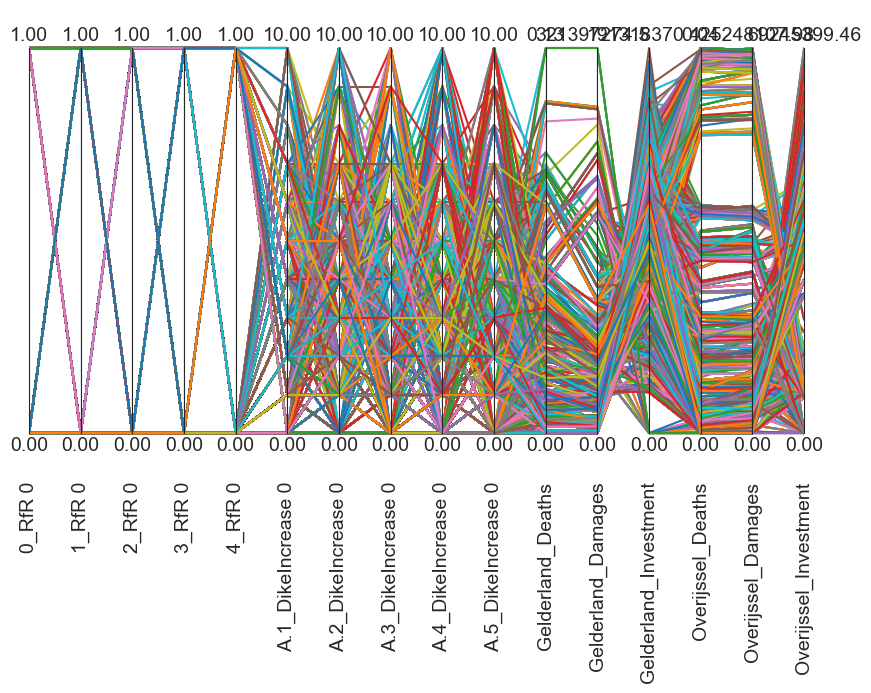

In [7]:
""" 
@Ryan
 """
#to_display = results.columns.tolist()
#excludeall EWS variables

to_display = ['0_RfR 0', '1_RfR 0', '2_RfR 0', '3_RfR 0', '4_RfR 0', 'A.1_DikeIncrease 0', 'A.2_DikeIncrease 0', 'A.3_DikeIncrease 0', 'A.4_DikeIncrease 0', 'A.5_DikeIncrease 0','Gelderland_Deaths', 'Gelderland_Damages', 'Gelderland_Investment', 'Overijssel_Deaths', 'Overijssel_Damages', 'Overijssel_Investment']
data = results.loc[:, to_display]
print(to_display)
limits = parcoords.get_limits(data)
limits.loc[0, to_display] = 0

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)


plt.show()


In [8]:
results.describe()

,Unnamed: 0,0_RfR 0,1_RfR 0,2_RfR 0,3_RfR 0,4_RfR 0,EWS_DaysToThreat,A.1_DikeIncrease 0,A.2_DikeIncrease 0,A.3_DikeIncrease 0,...,Gelderland_Damages,Gelderland_Investment,Overijssel_Deaths,Overijssel_Damages,Overijssel_Investment,Total_Deaths,Total_Damages,Total_Investment,Gelderland_RfR,Overijssel_RfR
count,7782.00000,7782.000000,7782.000000,7782.000000,7782.000000,7782.000000,7782.000000,7782.000000,7782.000000,7782.000000,...,7.782000e+03,7.782000e+03,7782.000000,7.782000e+03,7.782000e+03,7782.000000,7.782000e+03,7.782000e+03,7782.000000,7782.000000
mean,3890.50000,0.346569,0.163454,0.523002,0.525829,0.258802,0.469417,2.130172,2.892830,2.499100,...,3.293730e+07,9.956395e+07,0.006984,2.081820e+07,3.100590e+07,0.024343,5.375550e+07,3.415558e+08,1.033025,0.784631
std,2246.61423,0.475908,0.369803,0.499503,0.499365,0.438005,0.499096,1.905934,1.843254,1.878643,...,3.926586e+07,2.708009e+07,0.010911,3.058741e+07,1.309846e+07,0.020388,4.513668e+07,1.768047e+08,0.819574,0.736184
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,3.323659e+07,0.000000,0.000000
25%,1945.25000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,...,5.557725e+06,8.053760e+07,0.000117,5.607921e+05,2.757823e+07,0.008211,2.060129e+07,1.950255e+08,0.000000,0.000000
50%,3890.50000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,3.000000,2.000000,...,2.060129e+07,1.047347e+08,0.001813,7.987713e+06,3.389903e+07,0.020149,4.126216e+07,2.931580e+08,1.000000,1.000000
75%,5835.75000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,...,4.457460e+07,1.170172e+08,0.010619,3.054731e+07,3.864700e+07,0.034659,7.289805e+07,4.788415e+08,2.000000,1.000000
max,7781.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,...,3.213973e+08,1.913184e+08,0.044602,1.252481e+08,6.924540e+07,0.130788,3.289667e+08,8.907571e+08,3.000000,2.000000


In [9]:
#Political Filter
""" 
RFR on both provinces if any
Dike Increase > 5 on dike rin 3 and dike ring 5
Total Cost < 700 mio
 """
policies = results[(results["A.3_DikeIncrease 0"] > 5) & (results["A.5_DikeIncrease 0"] > 5)]
print(len(policies))
policies = policies[((policies["Gelderland_RfR"] > 0)&(policies["Overijssel_RfR"] > 0)) ]
print(len(policies))
#policies = policies[policies["Total_Investment"] < 900*10**6]
print(len(policies))
""" #Set threshiold for priority 1, 2 and 3: Deaths, Damages and Investment costs
distribution_threshold_deaths = 0.1
distribution_threshold_damages = 0.1
distribution_threshold_investment = 0.1
#Refine Policies-Dataframe to fit Priority 1 criterion
results2 = results.sort_values("Total_Deaths")
results2 = results.iloc[0:int(len(results2)*distribution_threshold_deaths),:]

#Refine Policies-Dataframe to fit Priority 2 criterion
results3 = results2.sort_values("Gelderland_Damages")
results3 = results3.iloc[0:int(len(results3)*distribution_threshold_damages),:]

#Refine Policies-Dataframe to fit Priority 3 criterion
results4 = results3.sort_values("Overijssel_Investment")
policies = results4.iloc[0:int(len(results4)*distribution_threshold_investment),:]
 """
pd.options.display.max_columns = None
display(policies)

43
12
12


,Unnamed: 0,0_RfR 0,1_RfR 0,2_RfR 0,3_RfR 0,4_RfR 0,EWS_DaysToThreat,A.1_DikeIncrease 0,A.2_DikeIncrease 0,A.3_DikeIncrease 0,A.4_DikeIncrease 0,A.5_DikeIncrease 0,A.1_Expected Annual Damage,A.1_Dike Investment Costs,A.1_Expected Number of Deaths,A.2_Expected Annual Damage,A.2_Dike Investment Costs,A.2_Expected Number of Deaths,A.3_Expected Annual Damage,A.3_Dike Investment Costs,A.3_Expected Number of Deaths,A.4_Expected Annual Damage,A.4_Dike Investment Costs,A.4_Expected Number of Deaths,A.5_Expected Annual Damage,A.5_Dike Investment Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,Gelderland_Deaths,Gelderland_Damages,Gelderland_Investment,Overijssel_Deaths,Overijssel_Damages,Overijssel_Investment,Total_Deaths,Total_Damages,Total_Investment,Gelderland_RfR,Overijssel_RfR
284,284,0,0,1,1,0,0,1,2,7,2,6,2.028410e+07,3.269490e+07,0.005724,5.557725e+06,4.281842e+07,0.002117,0.0,3.422156e+07,0.0,0.000000e+00,7.332080e+06,0.000000,0.0,4.027367e+07,0.0,151900000.0,0.0,0.007841,2.584183e+07,1.097349e+08,0.000000,0.000000e+00,4.760575e+07,0.007841,2.584183e+07,3.092406e+08,1,1
426,426,0,1,1,1,0,1,0,3,6,2,9,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,4.784270e+07,0.000000,0.0,3.139880e+07,0.0,1.665370e+06,7.332080e+06,0.000368,0.0,5.311400e+07,0.0,369700000.0,0.0,0.000000,0.000000e+00,7.924150e+07,0.000368,1.665370e+06,6.044608e+07,0.000368,1.665370e+06,5.093876e+08,2,1
2551,2551,0,0,1,1,0,0,2,3,7,0,6,0.000000e+00,3.725520e+07,0.000000,0.000000e+00,4.784270e+07,0.000000,0.0,3.422156e+07,0.0,9.504630e+06,0.000000e+00,0.001920,0.0,4.027367e+07,0.0,151900000.0,0.0,0.000000,0.000000e+00,1.193195e+08,0.001920,9.504630e+06,4.027367e+07,0.001920,9.504630e+06,3.114931e+08,1,1
2939,2939,1,0,0,1,0,1,0,3,6,6,7,0.000000e+00,0.000000e+00,0.000000,2.086088e+06,4.784270e+07,0.000810,0.0,3.139880e+07,0.0,0.000000e+00,1.258646e+07,0.000000,0.0,4.419351e+07,0.0,205800000.0,0.0,0.000810,2.086088e+06,7.924150e+07,0.000000,0.000000e+00,5.677997e+07,0.000810,2.086088e+06,3.418215e+08,1,1
3032,3032,0,0,1,1,1,0,1,2,6,1,7,2.028410e+07,3.269490e+07,0.005724,5.557725e+06,4.281842e+07,0.002117,0.0,3.139880e+07,0.0,1.648191e+06,6.320800e+06,0.000341,0.0,4.419351e+07,0.0,408000000.0,0.0,0.007841,2.584183e+07,1.069121e+08,0.000341,1.648191e+06,5.051431e+07,0.008182,2.749002e+07,5.654264e+08,1,2
4958,4958,1,0,0,1,1,1,3,4,6,1,6,0.000000e+00,4.229151e+07,0.000000,0.000000e+00,5.335857e+07,0.000000,0.0,3.139880e+07,0.0,2.663651e+06,6.320800e+06,0.000560,0.0,4.027367e+07,0.0,461900000.0,0.0,0.000000,0.000000e+00,1.270489e+08,0.000560,2.663651e+06,4.659447e+07,0.000560,2.663651e+06,6.355433e+08,1,2
5682,5682,1,0,0,1,0,0,0,3,7,2,6,0.000000e+00,0.000000e+00,0.000000,2.086088e+06,4.784270e+07,0.000810,0.0,3.422156e+07,0.0,1.031016e+06,7.332080e+06,0.000225,0.0,4.027367e+07,0.0,205800000.0,0.0,0.000810,2.086088e+06,8.206426e+07,0.000225,1.031016e+06,4.760575e+07,0.001035,3.117104e+06,3.354700e+08,1,1
5712,5712,1,1,1,1,0,0,0,2,7,1,6,0.000000e+00,0.000000e+00,0.000000,5.557725e+06,4.281842e+07,0.002117,0.0,3.422156e+07,0.0,4.140167e+06,6.320800e+06,0.000873,0.0,4.027367e+07,0.0,454300000.0,0.0,0.002117,5.557725e+06,7.703998e+07,0.000873,4.140167e+06,4.659447e+07,0.002989,9.697892e+06,5.779344e+08,3,1
7116,7116,0,0,1,1,0,0,2,0,6,0,6,0.000000e+00,3.725520e+07,0.000000,3.018207e+07,0.000000e+00,0.011146,0.0,3.139880e+07,0.0,5.802198e+06,0.000000e+00,0.001103,0.0,4.027367e+07,0.0,151900000.0,0.0,0.011146,3.018207e+07,6.865400e+07,0.001103,5.802198e+06,4.027367e+07,0.012249,3.598426e+07,2.608277e+08,1,1
7332,7332,0,1,1,1,1,0,2,2,6,1,6,0.000000e+00,3.725520e+07,0.000000,5.557725e+06,4.281842e+07,0.002117,0.0,3.139880e+07,0.0,1.648191e+06,6.320800e+06,0.000341,0.0,4.027367e+07,0.0,625800000.0,0.0,0.002117,5.557725e+06,1.114724e+08,0.000341,1.648191e+06,4.659447e+07,0.002458,7.205915e+06,7.838669e+08,2,2


In [10]:
#show 504
policies.iloc[2]

Unnamed: 0                       2.551000e+03
0_RfR 0                          0.000000e+00
1_RfR 0                          0.000000e+00
2_RfR 0                          1.000000e+00
3_RfR 0                          1.000000e+00
4_RfR 0                          0.000000e+00
EWS_DaysToThreat                 0.000000e+00
A.1_DikeIncrease 0               2.000000e+00
A.2_DikeIncrease 0               3.000000e+00
A.3_DikeIncrease 0               7.000000e+00
A.4_DikeIncrease 0               0.000000e+00
A.5_DikeIncrease 0               6.000000e+00
A.1_Expected Annual Damage       0.000000e+00
A.1_Dike Investment Costs        3.725520e+07
A.1_Expected Number of Deaths    0.000000e+00
A.2_Expected Annual Damage       0.000000e+00
A.2_Dike Investment Costs        4.784270e+07
A.2_Expected Number of Deaths    0.000000e+00
A.3_Expected Annual Damage       0.000000e+00
A.3_Dike Investment Costs        3.422156e+07
A.3_Expected Number of Deaths    0.000000e+00
A.4_Expected Annual Damage       9

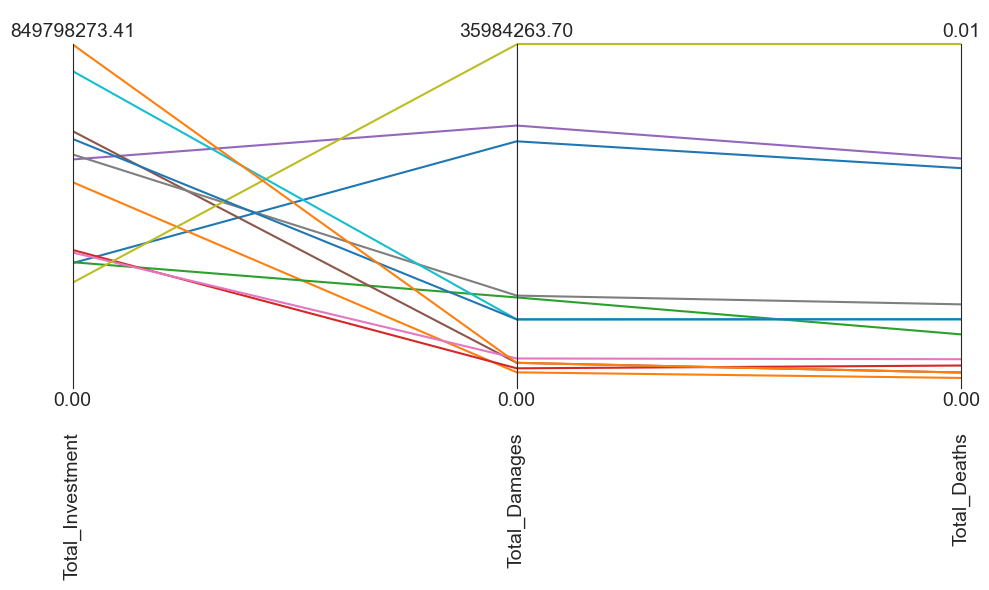

In [11]:



data = policies.loc[:, ["Total_Investment",
                        "Total_Damages",
                        "Total_Deaths",
                        ]]

limits = parcoords.get_limits(data)
limits.loc[0, [  "Total_Investment",
                        "Total_Damages",
                        "Total_Deaths",
                        ]] = 0

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)


plt.show()


#### 3b Robustness Analysis (Run Scenarios)

In [12]:

n_scenarios = 1000
# Policies are subsequently collected in a list as policy objects
policies_to_evaluate = []

for i, policy in policies.iterrows():
    policies_to_evaluate.append(Policy(str(i), **policy.to_dict()))


In [13]:

with MultiprocessingEvaluator(model) as evaluator:
    rob_results = evaluator.perform_experiments(n_scenarios,
                                            policies_to_evaluate)
    
save_results(rob_results, 'results/MORDM2_1k.tar.gz')



[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 1000 scenarios * 12 policies * 1 model(s) = 12000 experiments
100%|████████████████████████████████████| 12000/12000 [10:50<00:00, 18.44it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to c:\Users\varun\OneDrive\Desktop\model-based-decision-making\final_assignment\results\MORDM2_1k.tar.gz


In [14]:
rob_results = load_results ('results/MORDM2_1k.tar.gz')

[MainProcess/INFO] results loaded successfully from c:\Users\varun\OneDrive\Desktop\model-based-decision-making\final_assignment\results\MORDM2_1k.tar.gz


#### 3c Visualize Results
1) Signal to Noise Ratio
2) Calculate Maximum regret
3) Scenario Dicovery to understand bad conditions

##### 3c1 Signal to Noise Ratio

In [15]:
#signal to noise - high value for maximizable outcomes is desirable
#outcome to have high average value and low standard deviation

def s_to_n(data, direction):
    mean = np.mean(data)
    std = np.std(data)
    
    if direction==ScalarOutcome.MAXIMIZE:
        return mean/std
    else:
        return mean*std

In [16]:
experiments, outcomes = rob_results

df = pd.DataFrame(outcomes)

In [17]:
df

,A.1_Expected Annual Damage,A.1_Dike Investment Costs,A.1_Expected Number of Deaths,A.2_Expected Annual Damage,A.2_Dike Investment Costs,A.2_Expected Number of Deaths,A.3_Expected Annual Damage,A.3_Dike Investment Costs,A.3_Expected Number of Deaths,A.4_Expected Annual Damage,A.4_Dike Investment Costs,A.4_Expected Number of Deaths,A.5_Expected Annual Damage,A.5_Dike Investment Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,4.983304e+07,3.269490e+07,0.032037,0.000000e+00,4.281842e+07,0.000000,0.000000e+00,3.422156e+07,0.000000,0.000000e+00,7.332080e+06,0.000000,0.000000,4.027367e+07,0.000000,151900000.0,0.0
1,0.000000e+00,3.269490e+07,0.000000,9.246642e+06,4.281842e+07,0.012708,0.000000e+00,3.422156e+07,0.000000,0.000000e+00,7.332080e+06,0.000000,0.000000,4.027367e+07,0.000000,151900000.0,0.0
2,0.000000e+00,3.269490e+07,0.000000,7.813851e+06,4.281842e+07,0.008789,0.000000e+00,3.422156e+07,0.000000,1.253573e+06,7.332080e+06,0.000770,0.000000,4.027367e+07,0.000000,151900000.0,0.0
3,0.000000e+00,3.269490e+07,0.000000,1.218713e+08,4.281842e+07,0.151978,0.000000e+00,3.422156e+07,0.000000,0.000000e+00,7.332080e+06,0.000000,0.000000,4.027367e+07,0.000000,151900000.0,0.0
4,0.000000e+00,3.269490e+07,0.000000,0.000000e+00,4.281842e+07,0.000000,0.000000e+00,3.422156e+07,0.000000,2.873299e+05,7.332080e+06,0.000242,0.000000,4.027367e+07,0.000000,151900000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.000000e+00,3.269490e+07,0.000000,0.000000e+00,5.941010e+07,0.000000,0.000000e+00,3.139880e+07,0.000000,2.866412e+06,6.320800e+06,0.001038,0.000000,4.027367e+07,0.000000,679700000.0,0.0
11996,0.000000e+00,3.269490e+07,0.000000,0.000000e+00,5.941010e+07,0.000000,2.870497e+07,3.139880e+07,0.047229,1.816979e+07,6.320800e+06,0.007336,0.000000,4.027367e+07,0.000000,679700000.0,0.0
11997,0.000000e+00,3.269490e+07,0.000000,1.631154e+06,5.941010e+07,0.002342,0.000000e+00,3.139880e+07,0.000000,1.167192e+07,6.320800e+06,0.007688,0.000000,4.027367e+07,0.000000,679700000.0,0.0
11998,0.000000e+00,3.269490e+07,0.000000,0.000000e+00,5.941010e+07,0.000000,0.000000e+00,3.139880e+07,0.000000,0.000000e+00,6.320800e+06,0.000000,644773.522287,4.027367e+07,0.000873,679700000.0,0.0


In [18]:
df["Gelderland_Deaths"] = df[[f"A.{i+1}_Expected Number of Deaths" for i in range(3)]].sum(axis=1)
df["Gelderland_Damages"] = df[[f"A.{i+1}_Expected Annual Damage" for i in range(3)]].sum(axis=1)
df["Gelderland_Investment"] = df[[f"A.{i+1}_Dike Investment Costs" for i in range(3)]].sum(axis=1)
df["Overijssel_Deaths"] = df[[f"A.{i}_Expected Number of Deaths" for i in [4, 5]]].sum(axis=1)
df["Overijssel_Damages"] = df[[f"A.{i}_Expected Annual Damage" for i in [4, 5]]].sum(axis=1)
df["Overijssel_Investment"] = df[[f"A.{i}_Dike Investment Costs" for i in [4, 5]]].sum(axis=1)
df["Total_Deaths"] = df["Gelderland_Deaths"] + df["Overijssel_Deaths"]
df["Total_Damages"] = df["Gelderland_Damages"] + df["Overijssel_Damages"]
df["Total_Investment"] = df["Gelderland_Investment"] + df["Overijssel_Investment"]
outcomes = df.to_dict('list')



In [19]:
#For calculation of robustness, our outcomes dataframe is tranformed into a dictionary again
for k in outcomes.keys():
    outcomes[k] = np.array(outcomes[k])
outcome_names = [outcome.name for outcome in model.outcomes]
for name in ["Gelderland_Deaths", "Gelderland_Damages", "Gelderland_Investment","Overijssel_Deaths", "Overijssel_Damages", "Overijssel_Investment", "Total_Deaths", "Total_Damages", "Total_Investment"]:
    outcome_names.append(name)

    
# Calculation of signal-to-noise ratio per policy
overall_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}
    
    logical = experiments['policy']==policy
    
    for outcome in outcome_names:
        value  = outcomes[outcome][logical]
        sn_ratio = s_to_n(value, -1)
        scores[outcome] = sn_ratio
    overall_scores[policy] = scores
scores = pd.DataFrame.from_dict(overall_scores).T

In [20]:
colors = sns.color_palette(n_colors=13)

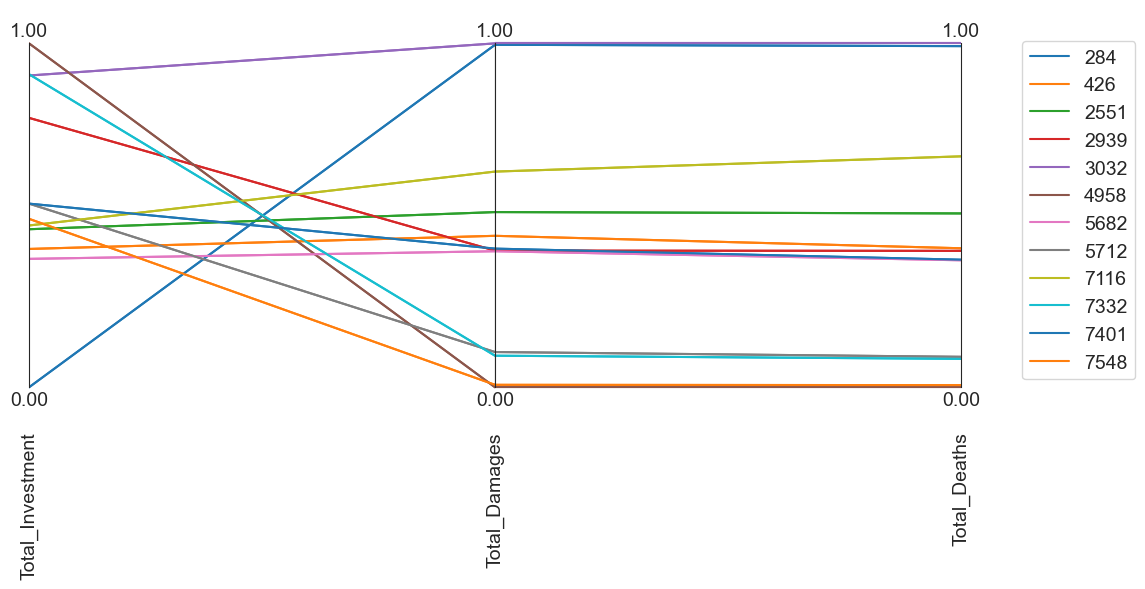

In [21]:

data = scores.loc[:, ["Total_Investment",
                        "Total_Damages",
                        "Total_Deaths",
                        ]]
data = ((data-data.min())/(data.max()-data.min()))
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
paraxes = parcoords.ParallelAxes(limits)
for j, (ind, row) in enumerate(data.reset_index().iterrows()):
            paraxes.plot(row.to_frame().T, label=int(row['index']),
                          color=colors[j])
paraxes.legend()
paraxes.plot(data)
plt.show()

        

##### 3c2 Calculate Regret

In [22]:
def calculate_regret(data, best):
    return np.abs(best-data)

In [23]:
experiments, outcomes = rob_results
overall_regret = {}
max_regret = {}
for outcome in model.outcomes:
    policy_column = experiments['policy']
    
    # create a DataFrame with all the relevant information
    # i.e., policy, scenario_id, and scores
    data = pd.DataFrame({outcome.name: outcomes[outcome.name], 
                         "policy":experiments['policy'],
                         "scenario":experiments['scenario']})
    
    # reorient the data by indexing with policy and scenario id
    data = data.pivot(index='scenario', columns='policy')
    
    # flatten the resulting hierarchical index resulting from 
    # pivoting, (might be a nicer solution possible)
    data.columns = data.columns.get_level_values(1)
    
    # Convert your DataFrame to a numpy array before multi-dimensional indexing
    data_array = data.to_numpy()

    # we need to control the broadcasting. 
    # max returns a 1d vector across scenario id. By passing
    # np.newaxis we ensure that the shape is the same as the data
    # next we take the absolute value
    #
    # basically we take the difference of the maximum across 
    # the row and the actual values in the row
    #
    outcome_regret = np.abs(data_array.max(axis=1)[:, np.newaxis] - data_array)
    # Convert numpy array back to DataFrame
    outcome_regret_df = pd.DataFrame(outcome_regret, index=data.index, columns=data.columns)
    
    overall_regret[outcome.name] = outcome_regret_df
    max_regret[outcome.name] = outcome_regret_df.max()


visualize as heatmap

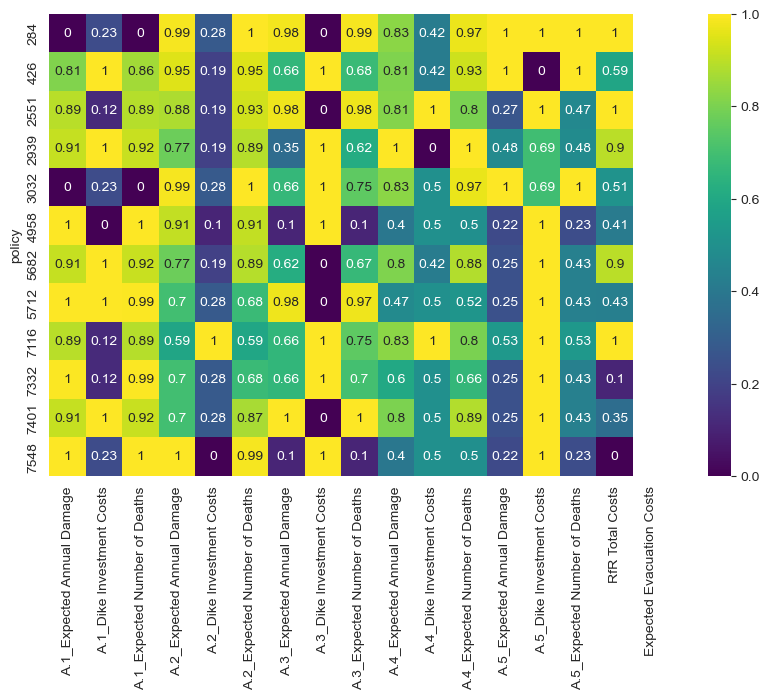

In [24]:
max_regret = pd.DataFrame(max_regret)
sns.heatmap(max_regret/max_regret.max(), cmap='viridis', annot=True)
plt.show()

visualize as parallel axis

c:\Users\varun\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:219: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


IndexError: list index out of range

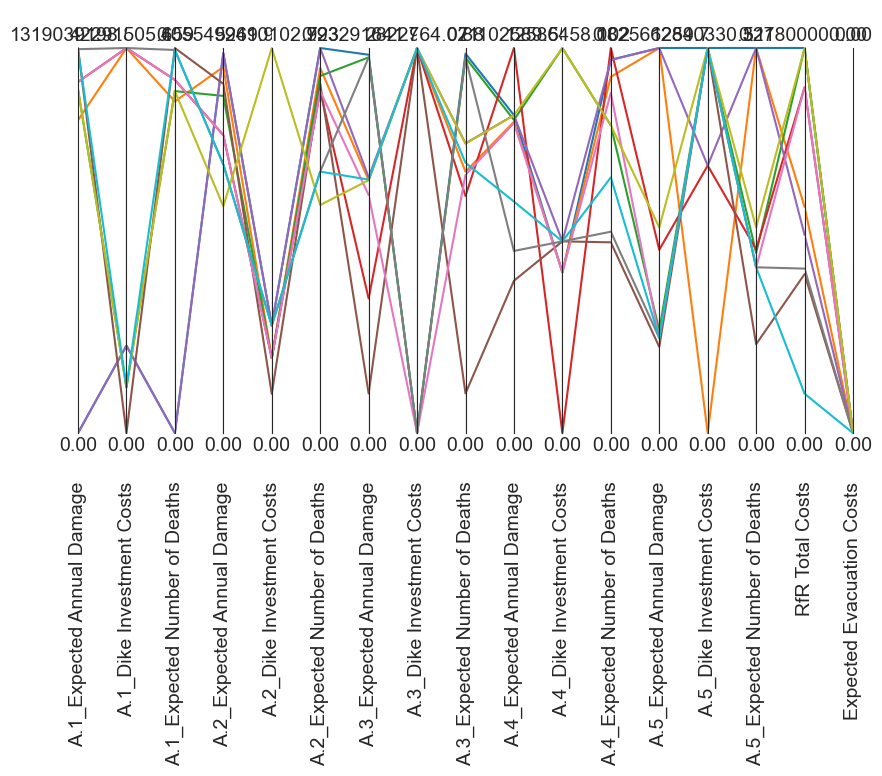

In [25]:
colors = sns.color_palette()

data = max_regret

# makes it easier to identify the policy associated with each line
# in the parcoords plot
# data['policy'] = data.index.astype("float64")

limits = parcoords.get_limits(data)
limits.loc[0, :] = 0

paraxes = parcoords.ParallelAxes(limits)
for i, (index, row) in enumerate(data.iterrows()):
    paraxes.plot(row.to_frame().T, label=str(index), color=colors[i])
paraxes.legend()
    
plt.show()